# BoomBikes - Linear Regression Case Study

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.



## 1. Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adjusting jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Read the given data file
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Inspecting the data
print(df.shape)

(730, 16)


There are 730 rows and 16 columns.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


Except of dteday, all values are either int or float.

In [7]:
# Check null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There aren't any null values in the given data set.

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Let's rename some columns to something better
df.rename(columns = { 'yr': 'year', 'mnth': 'month', 'temp': 'temperature', 'atemp': 'feelslike', 'hum': 'humidity', 'cnt': 'count'}, inplace=True)
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelslike,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# Map season to actual values
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['month'] = df['month'].map({ 1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' })
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelslike,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
df['weathersit'] = df['weathersit'].map({ 1: 'Clear', 2: 'Mist & Cloudy', 3:'Light Snow & Rain', 4: 'Snow & Fog' })
df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelslike,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2. Data Visualisation

Identifying categorical and numerical (continuous) variables.

In [12]:
df.nunique().sort_values()

year             2
holiday          2
workingday       2
weathersit       3
season           4
weekday          7
month           12
temperature    498
humidity       594
casual         605
windspeed      649
registered     678
feelslike      689
count          695
instant        730
dteday         730
dtype: int64

Variables having a large number of unique values are continuous variables, except dteday. Let's plot them into a pairplot to visualize the correlation between them WRT target variable 'count'.

In [13]:
categorical_vars = ['year', 'holiday', 'workingday', 'weathersit', 'season', 'weekday', 'month']
numerical_vars = ['temperature', 'humidity', 'casual', 'windspeed', 'registered', 'feelslike', 'count', 'instant']

### Visualising continuous variables

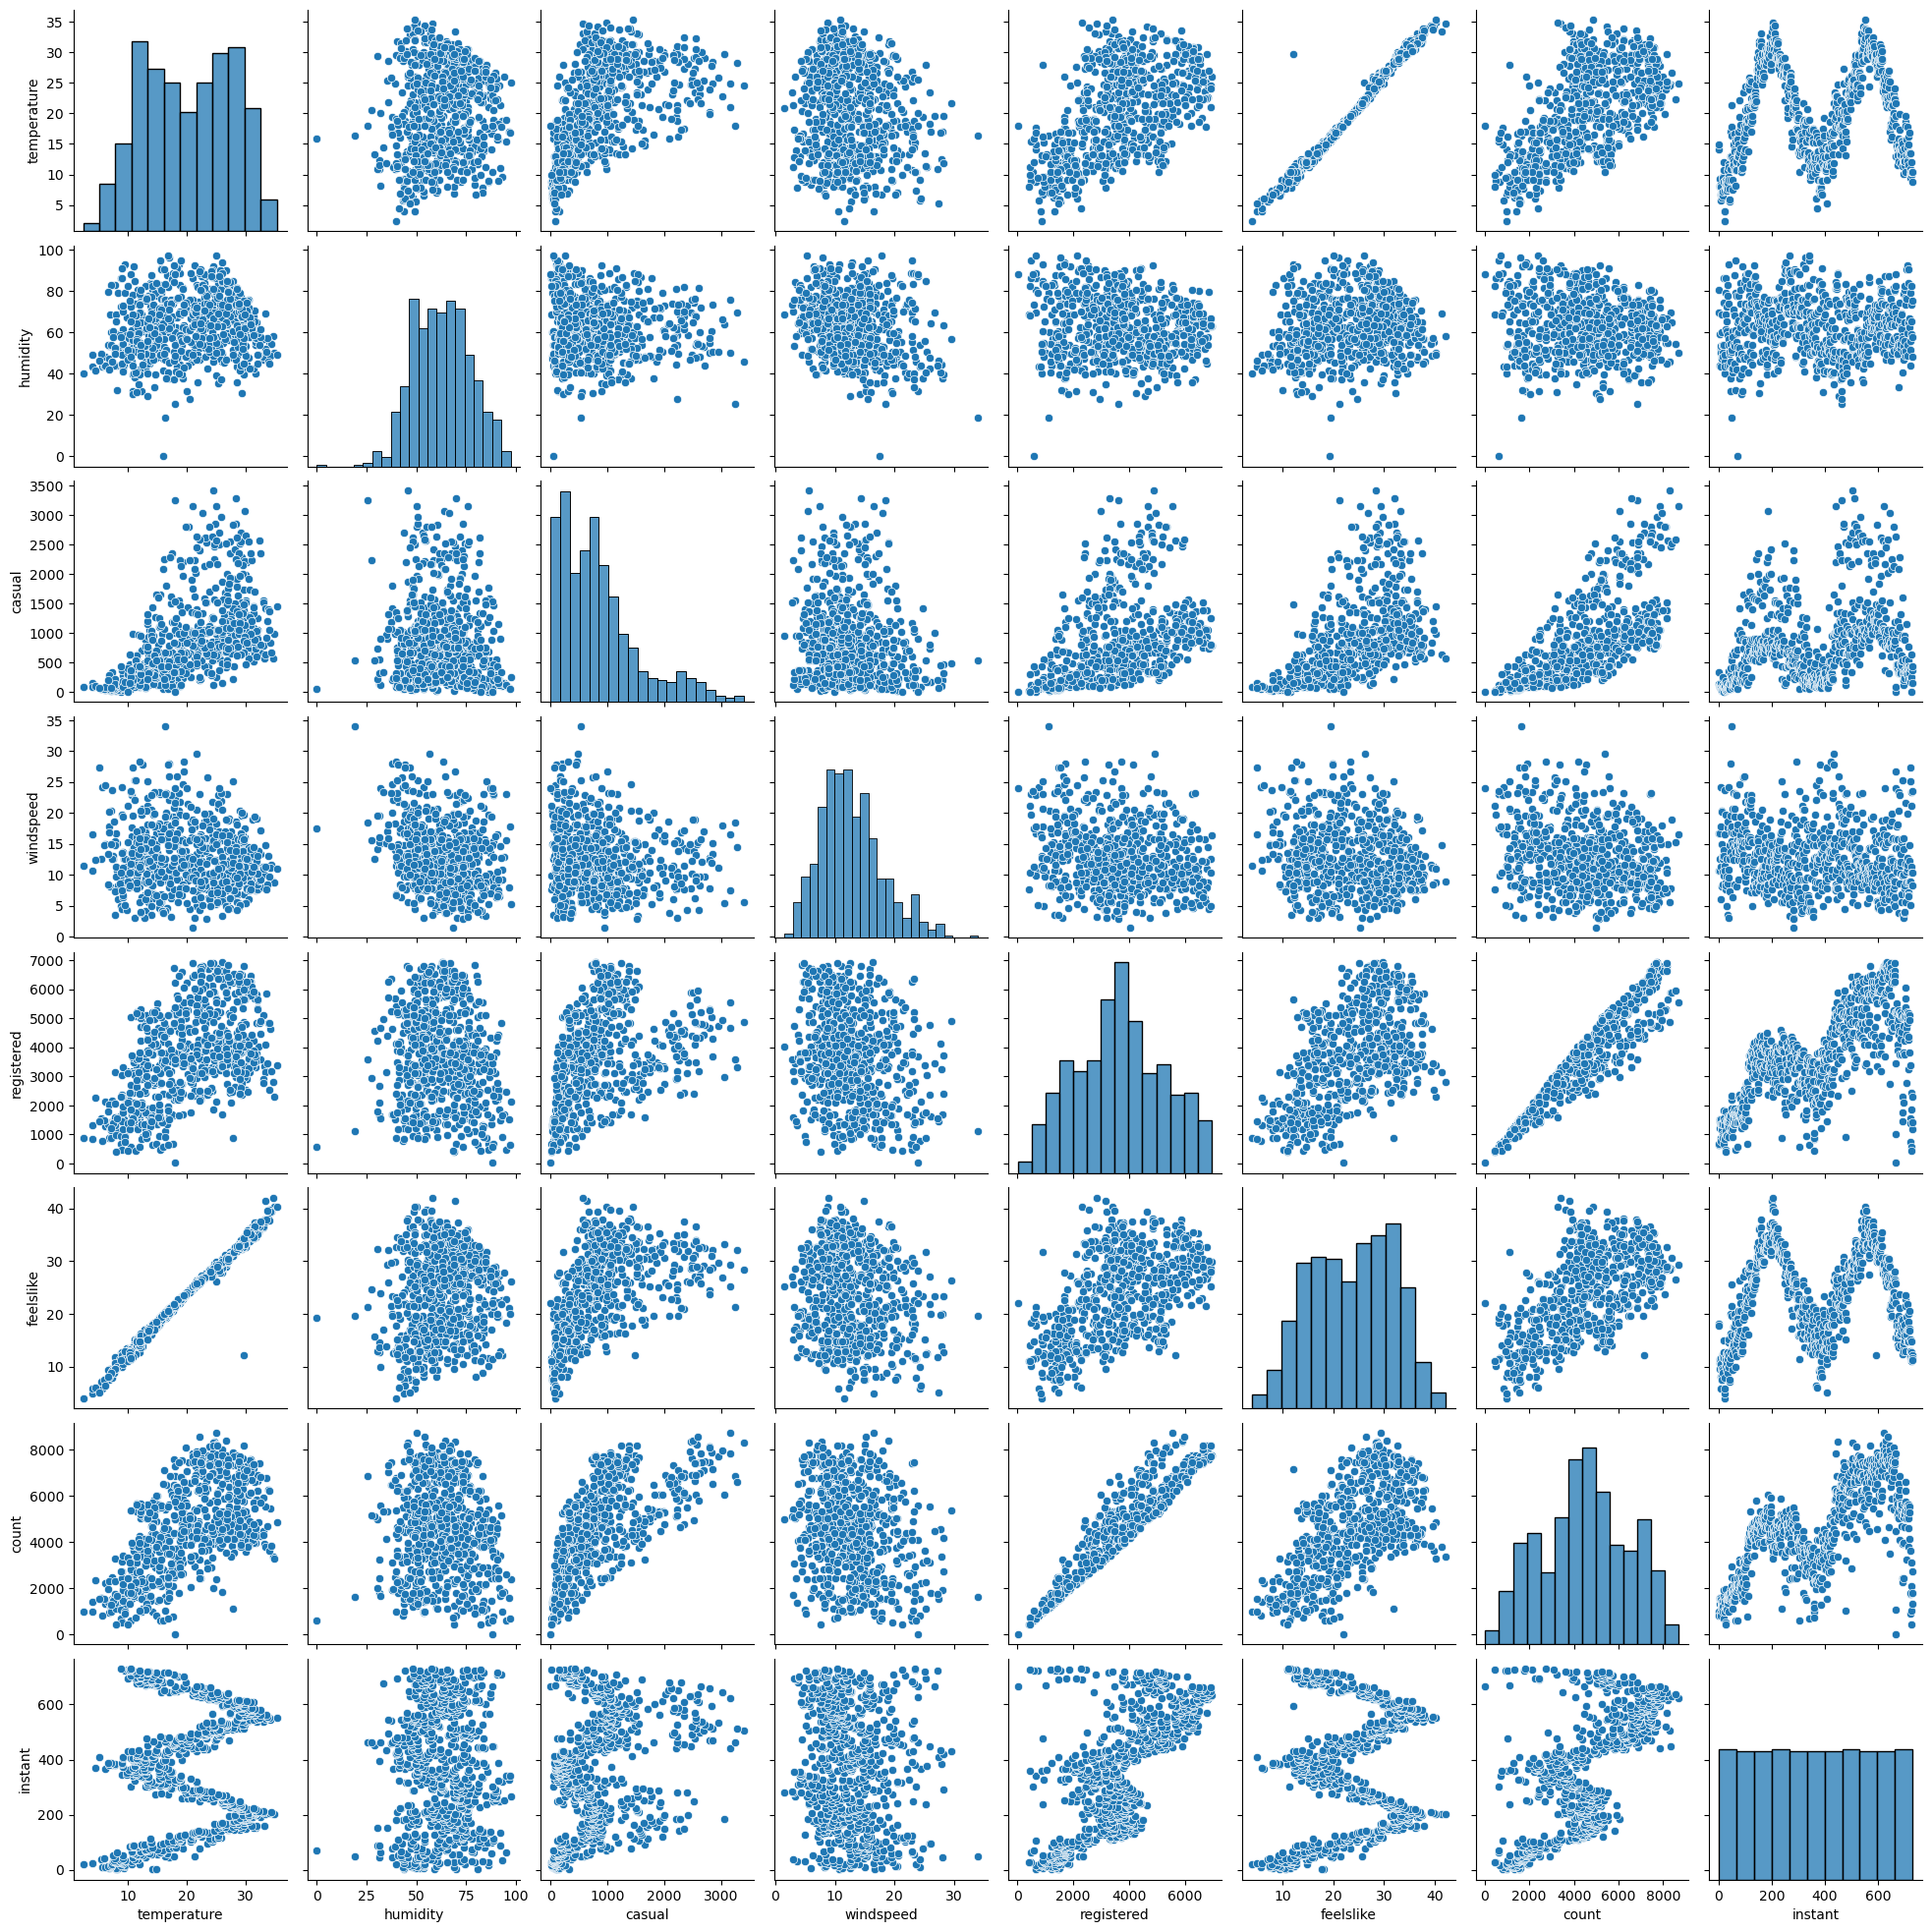

In [14]:
sns.pairplot(df, vars=numerical_vars)
plt.show()

There are some variables that seem to be positively correlated to count - temperature and feelslike.

### Visualising categorical variables

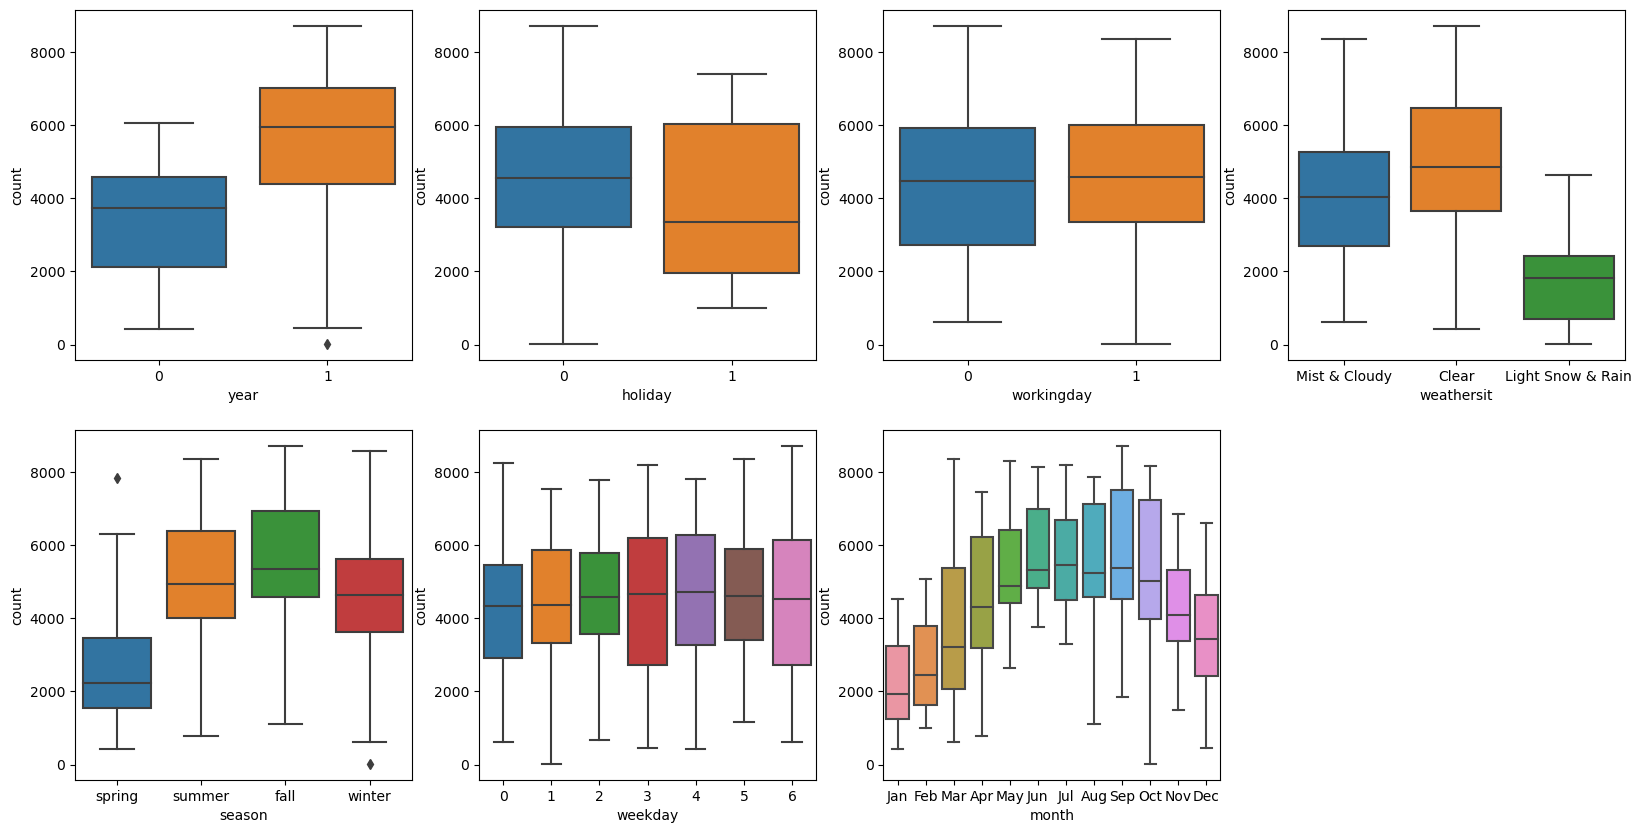

In [15]:
plt.figure(figsize=(20, 10))
i = 1
for var in categorical_vars:
    plt.subplot(2, 4, i)
    sns.boxplot(x = var, y = 'count', data = df)
    i += 1
plt.show()

Let's plot barplot as well to confirm relationships between weather, season and year.

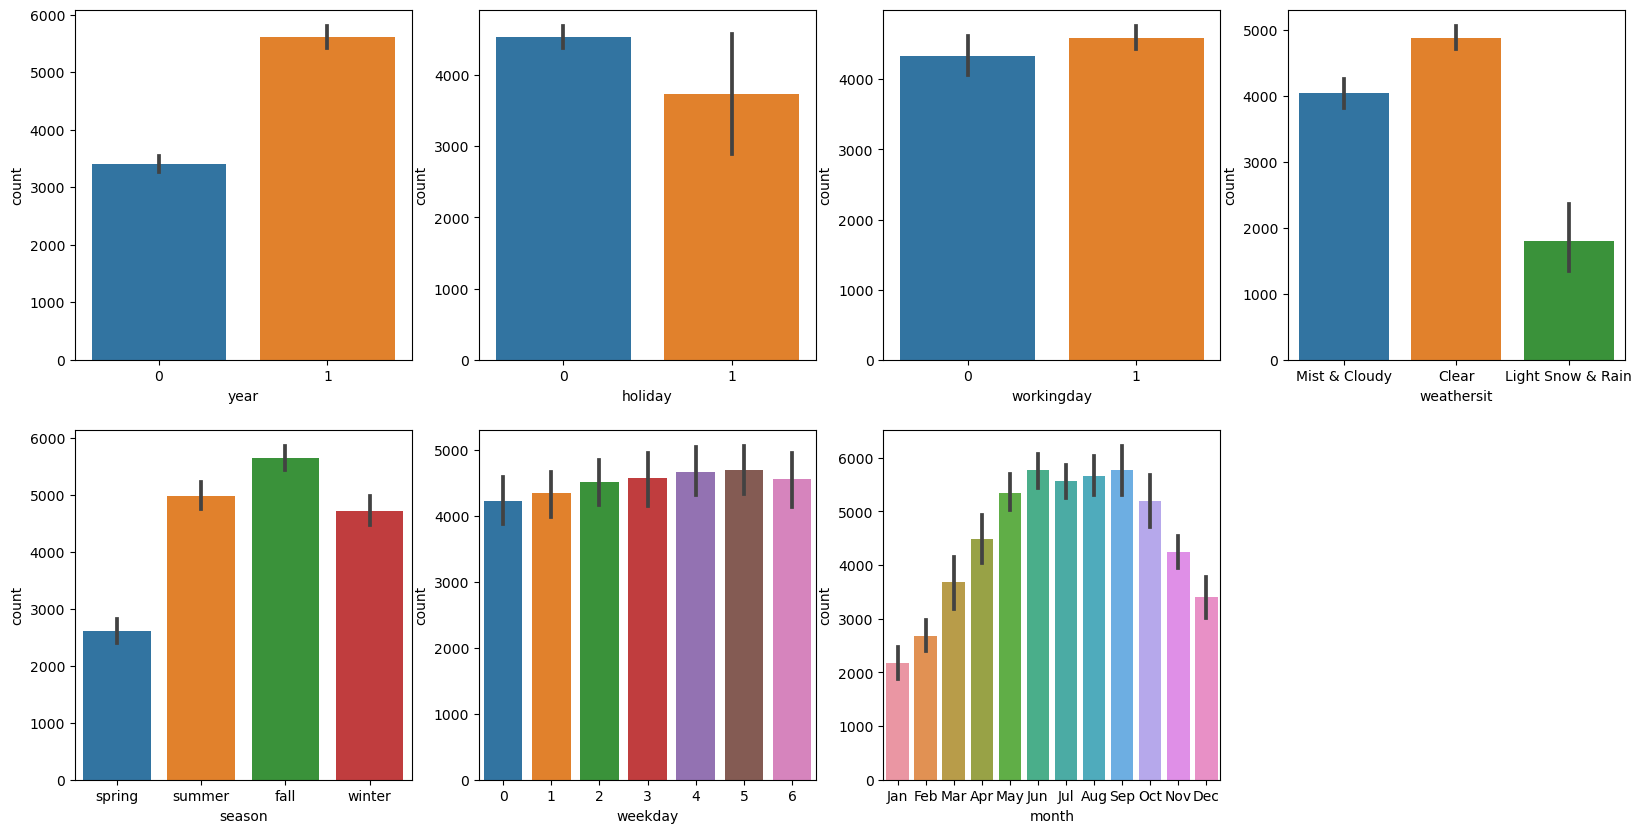

In [16]:
plt.figure(figsize=(20, 10))
i = 1
for var in categorical_vars:
    plt.subplot(2, 4, i)
    sns.barplot(x = var, y = 'count', data = df)
    i += 1
plt.show()

From the above plots:
- There were more bike rentals in the year 2019 compared to 2018.
- Bike rentals are highest during fall.
- Bike rentals are highest when the weather is clear or partly cloudy and lowest when it is snowy or rainy.

### Visualising correlation through heatmap

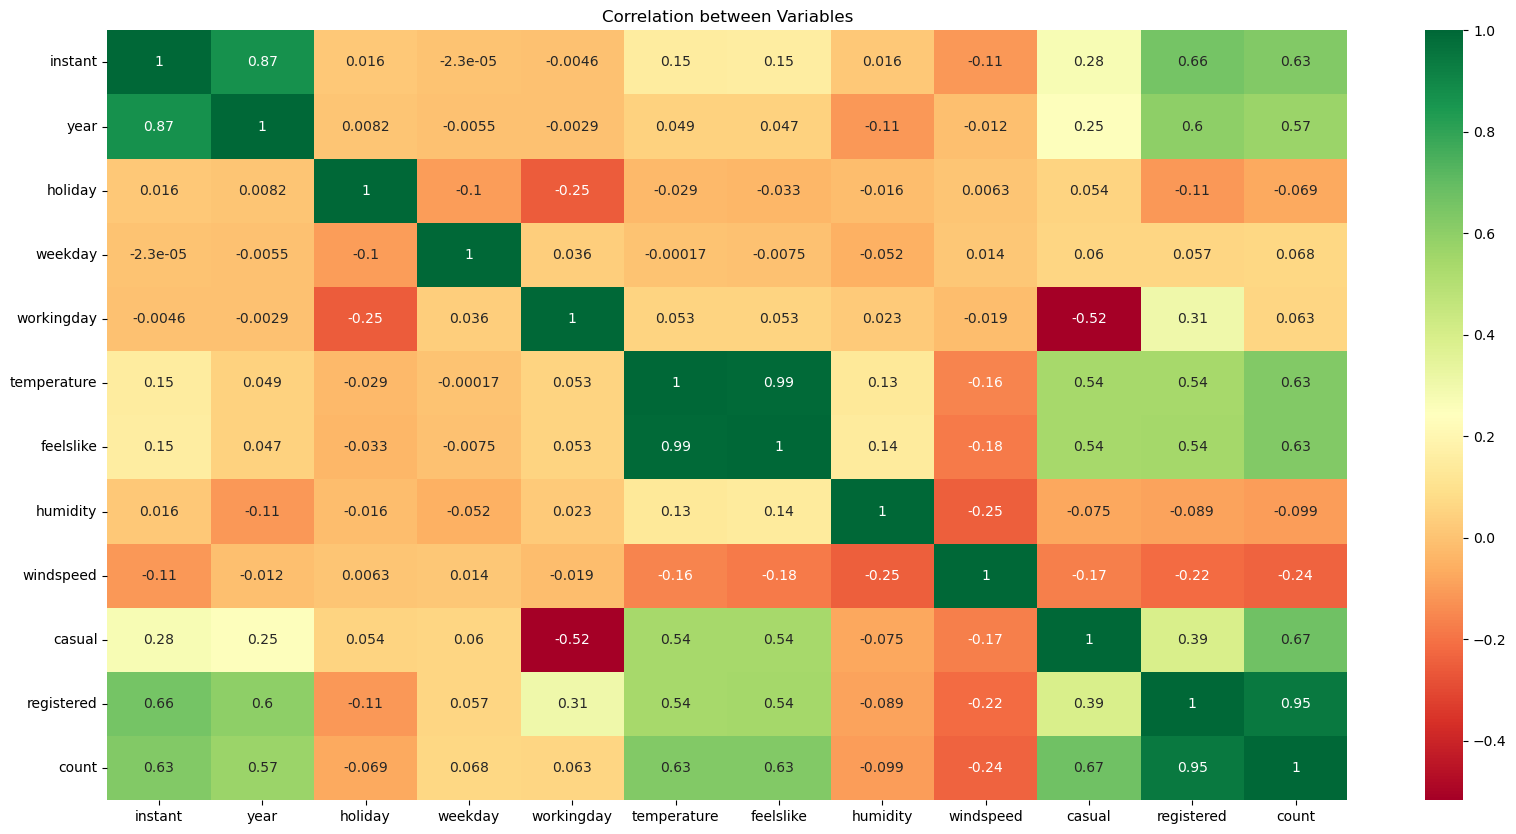

In [17]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.title("Correlation between Variables")
plt.show()

From the above heatmap and pairplot from an earlier step, it seems variables instant, year, temperature, feelslike, casual and registered are correlated with target variable count.

Also, since our target variable 'count' is a numerical variable, we can go ahead with a linear regression model.

## 3. Data Preparation

### Dummy variables
Let's create some dummy variables 

In [18]:
days = pd.get_dummies(pd.to_datetime(df['dteday'], format='%d-%m-%Y').dt.day_name(), drop_first=True)
months = pd.get_dummies(df['month'], drop_first=True)
weather_sits = pd.get_dummies(df['weathersit'], drop_first=True)
seasons = pd.get_dummies(df['season'], drop_first=True)

In [19]:
# Add the dummy variables to the dataframe
df = pd.concat([ days, months, weather_sits, seasons, df ], axis=1)
df.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temperature,feelslike,humidity,windspeed,casual,registered,count
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,01-01-2018,spring,0,Jan,0,6,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,2,02-01-2018,spring,0,Jan,0,0,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,3,03-01-2018,spring,0,Jan,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,4,04-01-2018,spring,0,Jan,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,05-01-2018,spring,0,Jan,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# Drop variables that have been converted to dummy variables
df.drop(['dteday', 'month', 'weathersit', 'season'], axis=1, inplace=True)

In [21]:
# Drop unnecessary or redundant variables
df.drop(['instant', 'casual', 'registered', 'feelslike'], axis=1, inplace=True)

In [22]:
df.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,weekday,workingday,temperature,humidity,windspeed,count
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,6,0,14.110847,80.5833,10.749882,985
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,1,8.200000,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,9.305237,43.6957,12.522300,1600


## 4. Splitting the data into training and testing sets

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [24]:
# Rows and columns after split
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the features
Using MinMax scaling here for 4 variables - temperature, humidity, windspeed, count

In [25]:
# Import the library and create an object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
num_vars = [ 'temperature', 'humidity', 'windspeed', 'count' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,weekday,workingday,temperature,humidity,windspeed,count
576,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0.815169,0.725633,0.264686,0.827658
426,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,6,0,0.442393,0.640189,0.255342,0.465255
728,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.245101,0.498067,0.663106,0.204096
482,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,6,0,0.395666,0.504508,0.188475,0.482973
111,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,5,1,0.345824,0.751824,0.380981,0.191095


In [27]:
df_train.describe()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,weekday,workingday,temperature,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,2.990196,0.676471,0.537440,0.650480,0.320883,0.513499
std,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,2.017093,0.468282,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.542596,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


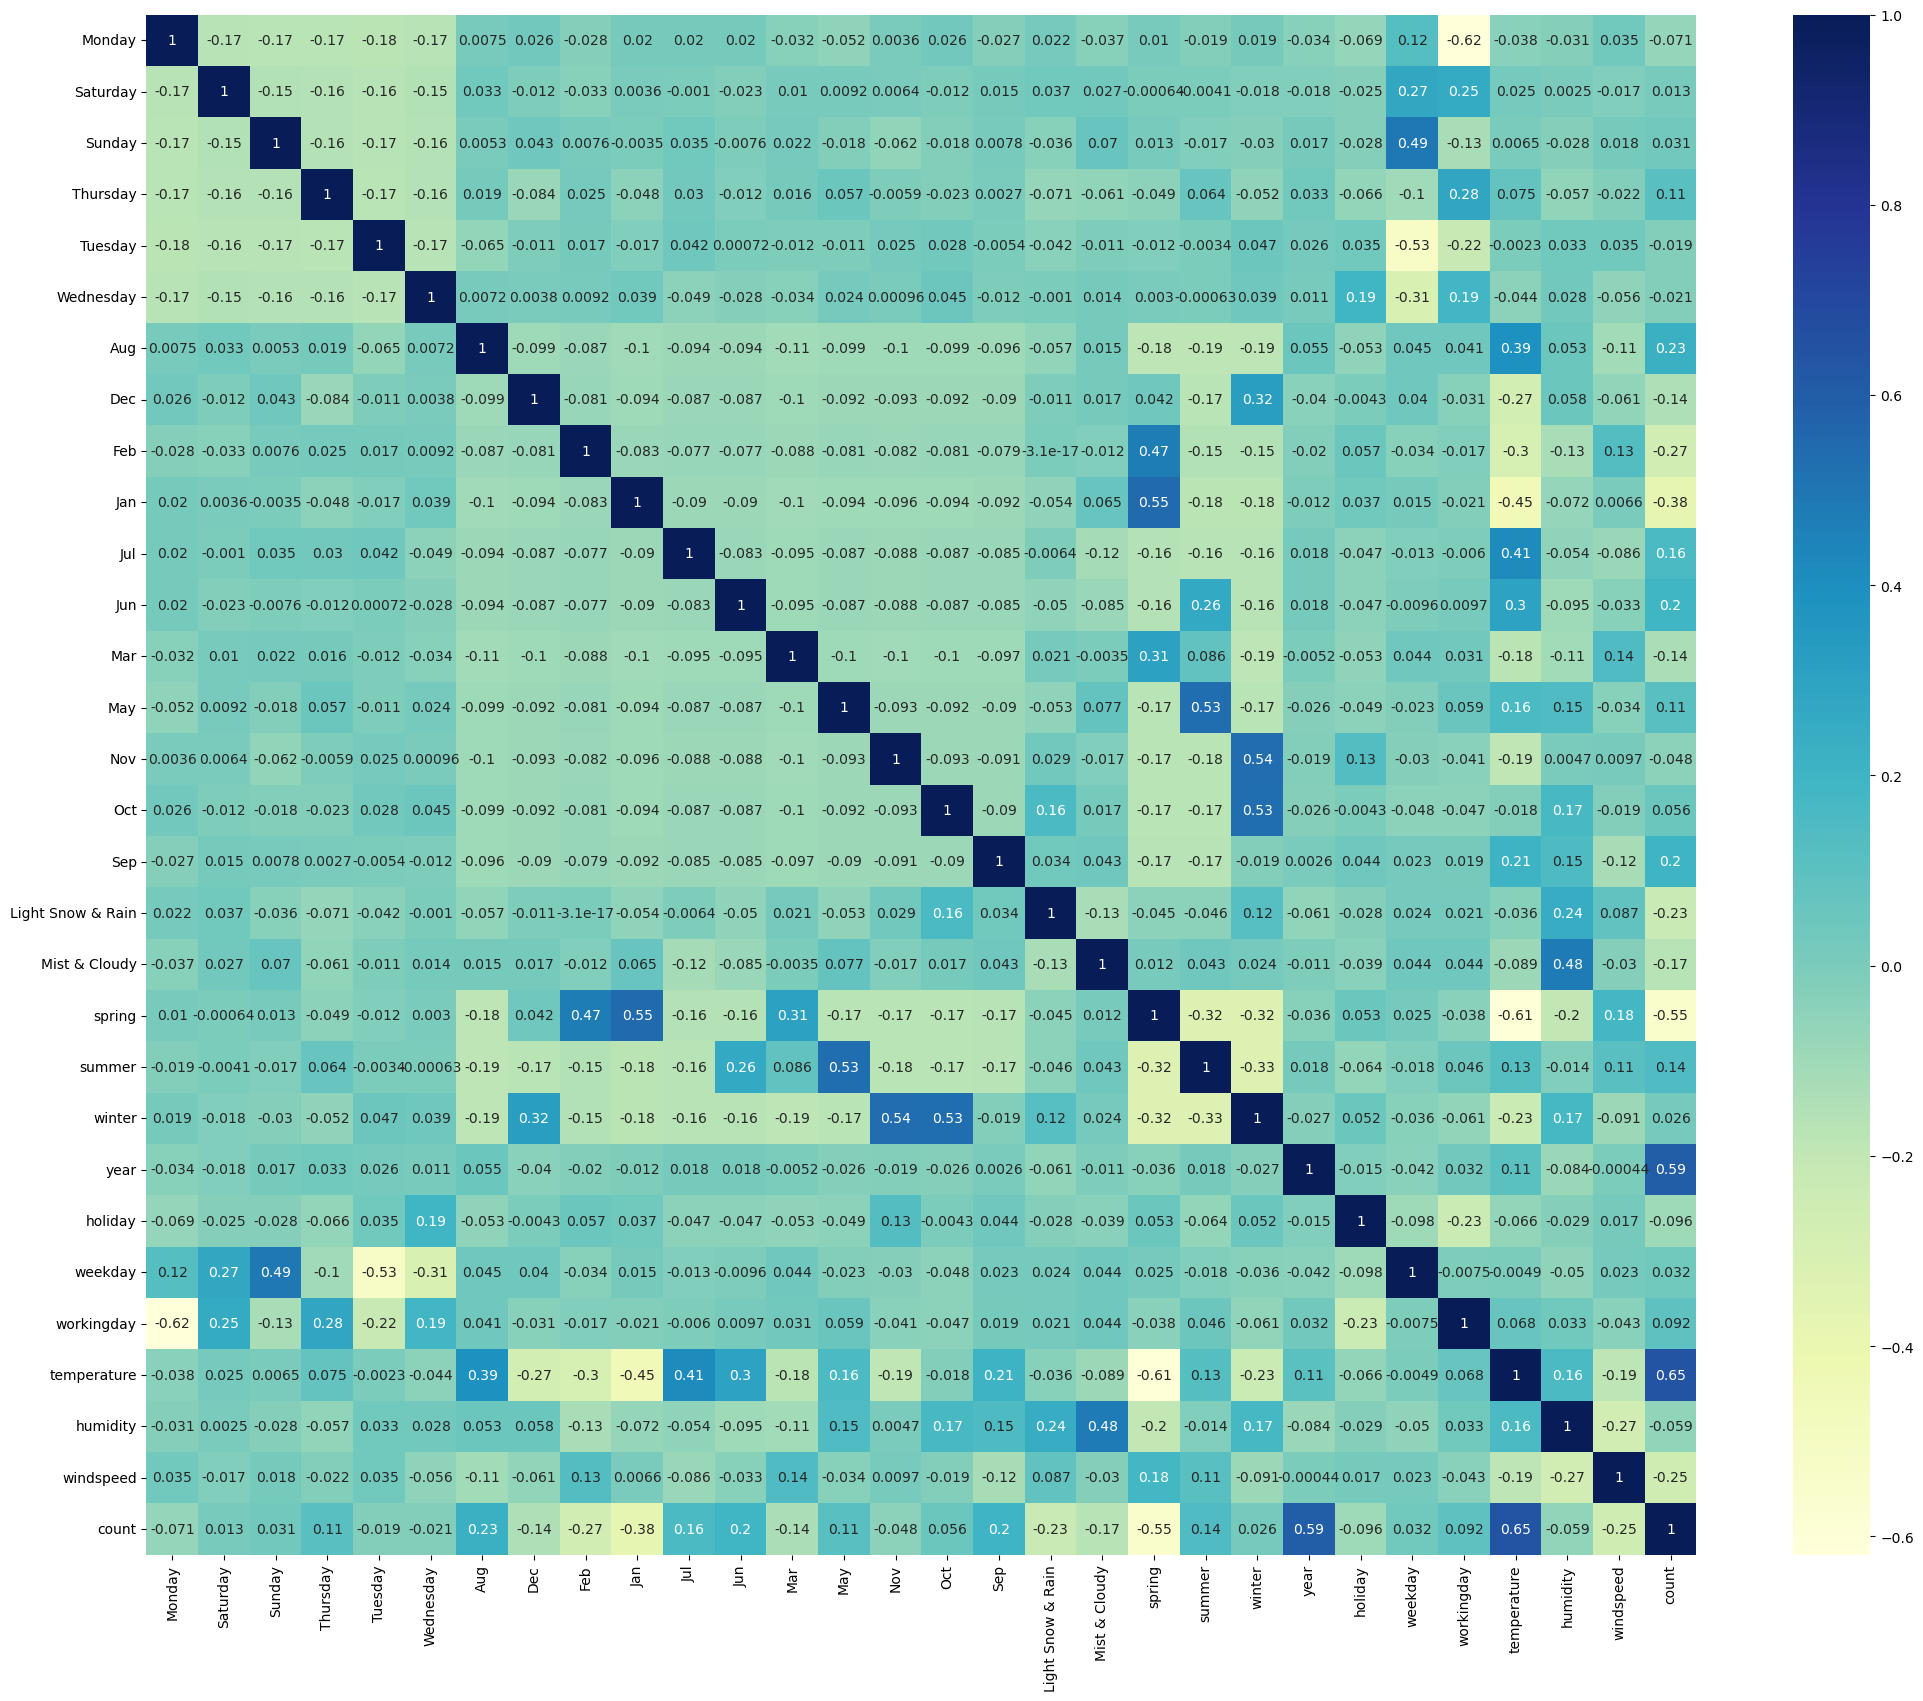

In [28]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As seen earlier also, year and temperature seem to be correlated with count.

### Dividing into X and y sets for model building

In [29]:
y_train = df_train.pop('count')
X_train = df_train

## 5. Building a model

In [30]:
df.shape

(730, 30)

Since there are a large number of features, it is better to use Recursive Feature Elimination for model building.

In [31]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [32]:
# Creating an object and fit the model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with the output number of the variable equal to 15
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [33]:
# List of variables selected
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Monday', False, 4),
 ('Saturday', False, 7),
 ('Sunday', False, 6),
 ('Thursday', False, 9),
 ('Tuesday', False, 13),
 ('Wednesday', False, 10),
 ('Aug', False, 5),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Light Snow & Rain', True, 1),
 ('Mist & Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 8),
 ('workingday', False, 15),
 ('temperature', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [34]:
# Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light Snow & Rain', 'Mist & Cloudy',
       'spring', 'summer', 'winter', 'year', 'holiday', 'temperature',
       'humidity', 'windspeed'],
      dtype='object')

In [35]:
# Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'weekday', 'workingday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [44]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
def run_linear_model(X_train, y_train):
    # Adding a constant variable 
    X_train_rfe = sm.add_constant(X_train)

    # Running the linear model 
    lm = sm.OLS(y_train, X_train_rfe).fit()

    return lm, X_train_rfe

In [47]:
lm, X_train_rfe = run_linear_model(X_train_rfe, y_train)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          8.15e-189
Time:                        22:53:11   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3197      0.03

### Checking VIF

In [48]:
def check_VIF(X_train_rfe):
    # Drop the constant
    X_train_rfe = X_train_rfe.drop(['const'], axis=1)

    vif = pd.DataFrame()
    X = X_train_rfe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [49]:
check_VIF(X_train_rfe)

             Features    VIF
13           humidity  30.89
12        temperature  17.79
14          windspeed   4.72
7              spring   4.37
9              winter   4.06
8              summer   2.82
6       Mist & Cloudy   2.32
10               year   2.09
3                 Nov   1.85
1                 Jan   1.75
2                 Jul   1.59
0                 Dec   1.56
4                 Sep   1.41
5   Light Snow & Rain   1.28
11            holiday   1.06


#### Dec has high p-value and low VIF. I think this can be dropped.

In [50]:
# Drop Dec
X_train_rfe_1 = X_train_rfe.drop(['Dec'], axis=1)

#### Rebuild the model without Dec

In [51]:
lm1, X_train_rfe_1 = run_linear_model(X_train_rfe_1, y_train)
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.41e-189
Time:                        22:53:24   Log-Likelihood:                 512.08
No. Observations:                 510   AIC:                            -994.2
Df Residuals:                     495   BIC:                            -930.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3032      0.03

In [52]:
check_VIF(X_train_rfe_1)

             Features    VIF
12           humidity  29.09
11        temperature  16.80
13          windspeed   4.72
6              spring   4.37
8              winter   3.78
7              summer   2.80
5       Mist & Cloudy   2.29
9                year   2.09
0                 Jan   1.67
2                 Nov   1.60
1                 Jul   1.59
3                 Sep   1.40
4   Light Snow & Rain   1.25
10            holiday   1.06


#### Humidity has very high VIF, dropping it

In [53]:
# Drop humidity
X_train_rfe_2 = X_train_rfe_1.drop(['humidity'], axis=1)

#### Rebuild the model without humidity

In [54]:
lm2, X_train_rfe_2 = run_linear_model(X_train_rfe_2, y_train)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.93e-186
Time:                        22:53:31   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2208      0.03

In [55]:
check_VIF(X_train_rfe_2)

             Features   VIF
11        temperature  5.15
12          windspeed  4.67
6              spring  2.76
8              winter  2.28
7              summer  2.24
9                year  2.07
0                 Jan  1.61
2                 Nov  1.60
1                 Jul  1.59
5       Mist & Cloudy  1.56
3                 Sep  1.35
4   Light Snow & Rain  1.08
10            holiday  1.06


#### Nov seems to have high p-value and low VIF. Since it seems insignificant, dropping it.

In [56]:
# Drop Nov
X_train_rfe_3 = X_train_rfe_2.drop(['Nov'], axis=1)

#### Rebuild the model without Nov

In [57]:
lm3, X_train_rfe_3 = run_linear_model(X_train_rfe_3, y_train)
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          8.14e-187
Time:                        22:53:50   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2154      0.03

In [58]:
check_VIF(X_train_rfe_3)

             Features   VIF
10        temperature  5.13
11          windspeed  4.62
5              spring  2.75
6              summer  2.24
8                year  2.07
7              winter  1.78
0                 Jan  1.61
1                 Jul  1.59
4       Mist & Cloudy  1.56
2                 Sep  1.34
3   Light Snow & Rain  1.08
9             holiday  1.04


In [59]:
#### Jan seems to have high p-value and low VIF. Since it seems insignificant, dropping it.

In [60]:
# Drop Jan
X_train_rfe_4 = X_train_rfe_3.drop(['Jan'], axis=1)

#### Rebuild the model without Jan

In [61]:
lm4, X_train_rfe_4 = run_linear_model(X_train_rfe_4, y_train)
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.06e-187
Time:                        22:53:56   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1994      0.03

In [62]:
check_VIF(X_train_rfe_4)

             Features   VIF
9         temperature  5.09
10          windspeed  4.60
5              summer  2.23
4              spring  2.08
7                year  2.07
6              winter  1.78
0                 Jul  1.58
3       Mist & Cloudy  1.55
1                 Sep  1.34
2   Light Snow & Rain  1.08
8             holiday  1.04


#### Jul still has highest p-value amongst remaining features and it also has low VIF. Seems insignificant, dropping it.

In [63]:
# Drop Jul
X_train_rfe_5 = X_train_rfe_4.drop(['Jul'], axis=1)

#### Rebuild the model without Jul

In [65]:
lm5, X_train_rfe_5 = run_linear_model(X_train_rfe_5, y_train)
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.47e-186
Time:                        22:54:06   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1909      0.03

In [66]:
check_VIF(X_train_rfe_5)

            Features   VIF
9          windspeed  4.60
8        temperature  3.84
6               year  2.07
3             spring  1.99
4             summer  1.90
5             winter  1.63
2      Mist & Cloudy  1.55
0                Sep  1.23
1  Light Snow & Rain  1.08
7            holiday  1.04


Now, the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model only.

## 6. Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
X_train_rfe_5

,const,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,temperature,windspeed
576,1.0,0,0,0,0,0,0,1,0,0.815169,0.264686
426,1.0,0,0,1,1,0,0,1,0,0.442393,0.255342
728,1.0,0,0,0,1,0,0,1,0,0.245101,0.663106
482,1.0,0,0,1,0,1,0,1,0,0.395666,0.188475
111,1.0,0,0,1,0,1,0,0,0,0.345824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,1,0,0.863973,0.187140
53,1.0,0,0,0,1,0,0,0,0,0.202618,0.111379
350,1.0,0,0,1,0,0,1,0,0,0.248216,0.431816
79,1.0,0,0,1,0,1,0,0,0,0.462664,0.529881


In [68]:
# y train predicted
y_train_pred = lm5.predict(X_train_rfe_5)

<Figure size 640x480 with 0 Axes>

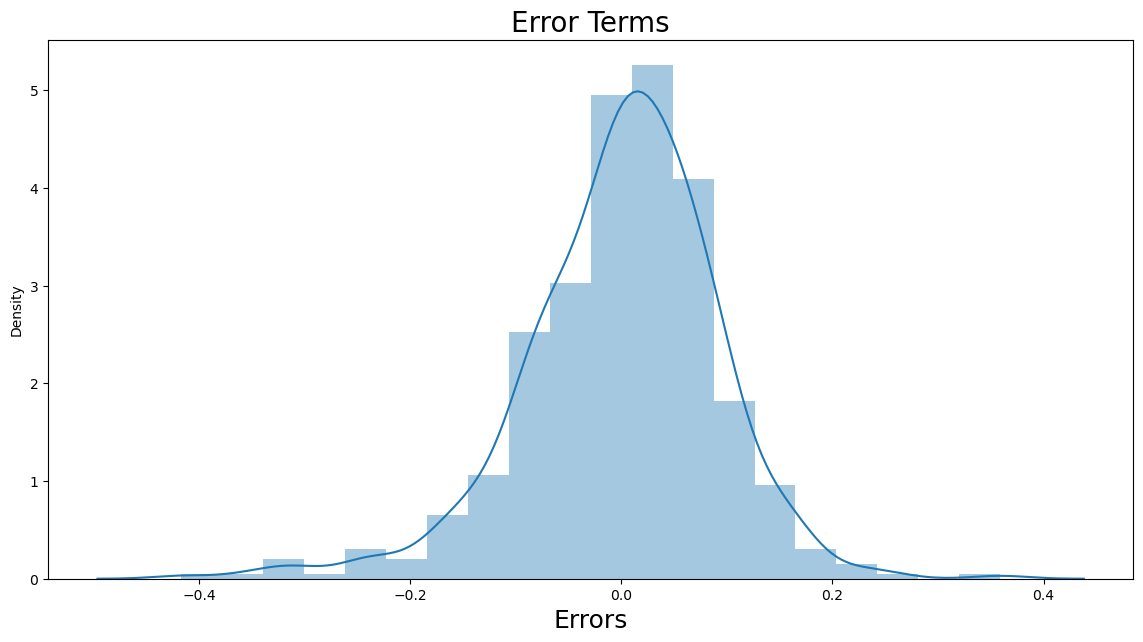

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)   # Plot heading 
plt.xlabel('Errors', fontsize = 18)       # X-label
plt.show()

#### The error terms look like normally distributed.

## 7. Making Predictions using the final model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. lm5.

#### Applying the scaling on the test sets

In [70]:
# Using the list of numeric variables from earlier steps
num_vars = [ 'temperature', 'humidity', 'windspeed', 'count' ]

# Fit on data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,weekday,workingday,temperature,humidity,windspeed,count
184,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0.831783,0.657364,0.084219,0.692706
535,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,3,1,0.901354,0.610133,0.153728,0.712034
299,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,4,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0.881625,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,1,0.817246,0.314298,0.537414,0.569029


#### Dividing into X_test and y_test

In [71]:
y_test = df_test.pop('count')
X_test = df_test
X_test.describe()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,weekday,workingday,temperature,humidity,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,3.013636,0.700000,0.558718,0.638221,0.313293
std,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,1.985057,0.459303,0.233187,0.148694,0.159584
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.355429,0.529197,0.198843
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.558172,0.625590,0.300126
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.755981,0.743798,0.402718
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,0.984424,1.002146,0.807474


In [72]:
# Columns 
X_train_rfe_5.columns

Index(['const', 'Sep', 'Light Snow & Rain', 'Mist & Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'temperature', 'windspeed'],
      dtype='object')

In [73]:
X_train_rfe_5 = X_train_rfe_5.drop(['const'], axis=1)

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe_5.columns]

# Adding a constant variable 
X_test_new1 = sm.add_constant(X_test_new)
X_test_new1.head()

,const,Sep,Light Snow & Rain,Mist & Cloudy,spring,summer,winter,year,holiday,temperature,windspeed
184,1.0,0,0,1,0,0,0,0,1,0.831783,0.084219
535,1.0,0,0,0,0,1,0,1,0,0.901354,0.153728
299,1.0,0,0,1,0,0,1,0,0,0.511964,0.334206
221,1.0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,1.0,0,0,0,0,1,0,0,0,0.817246,0.537414


In [75]:
# Making predictions
y_pred = lm5.predict(X_test_new1)

### Finding R-squared and Adjusted R-Squared for Test set

In [77]:
# Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8038195990728845

In [78]:
# Adjusted R^2
# Adj R2 = 1 - (1 - R2) * (n - 1) / (n - p - 1)

# n = sample size, p = number of independent variables

Adj_r2 = 1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj_r2)

0.7905647777777778


## 8. Model Evaluation

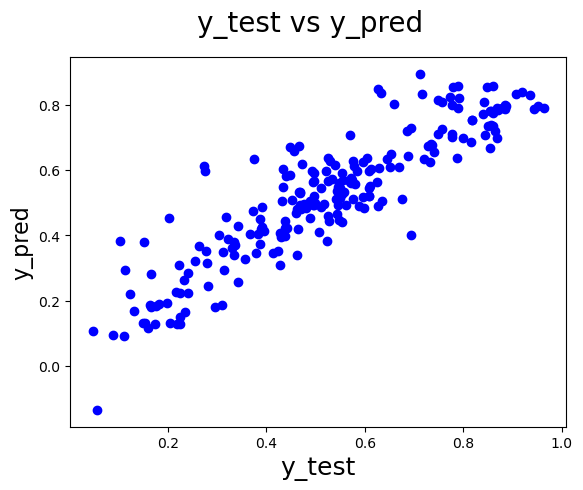

In [84]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color='blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

#### Visualising the fit on the test set

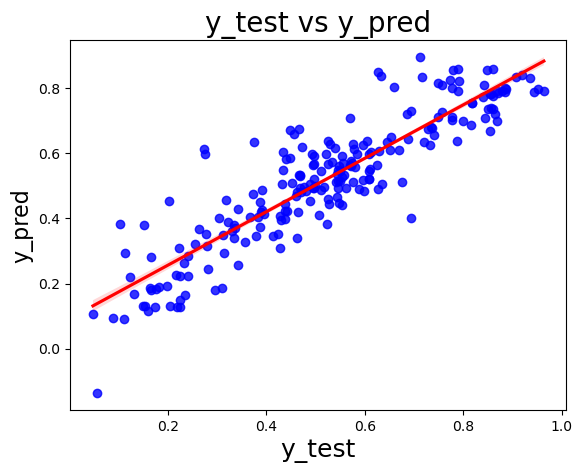

In [86]:
# Regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                       # X-label
plt.ylabel('y_pred', fontsize=16)                       # Y-label
plt.show()


We can see that the equation of our best fitted line is:

$ count = 0.478 x temperature + 0.234 x year + 0.094 x winter + 0.091 x Sep + 0.062 x summer 
- 0.285 x (Light Snow & Rain) - 0.148 x windspeed - 0.096 x holiday - 0.0787 x (Mist & Cloudy) - 0.055 x spring $

## Comparison between Train and Test models

- Train R^2 = 0.833
- Train Adjusted R^2 = 0.829
- Test R^2 = 0.803
- Test Adjusted R^2 = 0.790
- Difference in R^2 between train and test = 3.0%
- Difference in adjusted R^2 between Train and test = 3.9% which is less than 5%

## Interpretation
- We've arrived at a model for demand of shared bikes with significant number of variables.
- Temperature variable has the highest coefficient of 0.478, which means that on increase of 1 unit in temperature, the number of bike rentals go up by 0.478 units provided other variables are held constant.
- We also see there are some variables with negative coefficients. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease. We have Light Snow & Rain, windspeed, holiday and spring variables with negative coefficients. The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant